## The purpose of the assignment is to develop a model to forecast future stock figures of forcibly displaced persons by country of origin 5 years from now. The total number of displaced of any country should be disaggregated between those displaced internally within the country (IDP), those displaced abroad that obtained refugee status (REF), and those that requested asylum and are still waiting for a decision (ASY).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
fatalities = pd.read_csv("Data/fatalities.csv", index_col=0)
print("The dataset has {} rows and {} columns.".format(*fatalities.shape))
fatalities.head()

The dataset has 1518 rows and 4 columns.


,year,iso_o,Country,Fatalities_acled
1,1997,AGO,Angola,5262
2,1997,BDI,Burundi,4142
3,1997,BEN,Benin,0
4,1997,BFA,Burkina Faso,0
5,1997,BWA,Botswana,0


In [3]:
len(pd.unique(fatalities.Country)), len(pd.unique(fatalities.year))

(146, 24)

# EL OBJETIVO ES PREDECIR LAS 3 COLUMNAS: REF, IDP Y ASY POR PAÍS PARA LOS PRÓXIMOS 5 AÑOS

In [4]:
forcibly_displaced = pd.read_csv("Data/forciby_displaced.csv", encoding = "ISO-8859-1", index_col=0)
print("The dataset has {} rows and {} columns.".format(*forcibly_displaced.shape))
forcibly_displaced.head()

The dataset has 103302 rows and 8 columns.


,Year,CountryOriginCode,CountryAsylumCode,CountryOriginName,CountryAsylumName,REF,IDP,ASY
1,1951,UKN,AUS,NaN,Australia,180000.0,0.0,0
2,1951,UKN,AUT,NaN,Austria,282000.0,0.0,0
3,1951,UKN,BEL,NaN,Belgium,55000.0,0.0,0
4,1951,UKN,CAN,NaN,Canada,168511.0,0.0,0
5,1951,UKN,DNK,NaN,Denmark,2000.0,0.0,0


In [5]:
print(f"Tenemos {len(pd.unique(forcibly_displaced.CountryOriginCode))} países distintos")

Tenemos 211 países distintos


Podemos quitar los nombres de los países porque no creo que hagan nada:

In [6]:
forcibly_displaced.pop("CountryOriginName")
forcibly_displaced.pop("CountryAsylumName")
forcibly_displaced.head()

,Year,CountryOriginCode,CountryAsylumCode,REF,IDP,ASY
1,1951,UKN,AUS,180000.0,0.0,0
2,1951,UKN,AUT,282000.0,0.0,0
3,1951,UKN,BEL,55000.0,0.0,0
4,1951,UKN,CAN,168511.0,0.0,0
5,1951,UKN,DNK,2000.0,0.0,0


In [7]:
forcibly_displaced.CountryOriginCode

1         UKN
2         UKN
3         UKN
4         UKN
5         UKN
         ... 
103298    ZWE
103299    ZWE
103300    ZWE
103301    ZWE
103302    ZWE
Name: CountryOriginCode, Length: 103302, dtype: object

In [8]:
forcibly_displaced.isna().sum()

Year                   0
CountryOriginCode    124
CountryAsylumCode      0
REF                   86
IDP                   26
ASY                    0
dtype: int64

In [9]:
pd.unique(forcibly_displaced.CountryOriginCode)

array(['UKN', 'AGO', 'GHA', 'RWA', 'GNB', 'SDN', 'ALB', 'ARM', 'CHN',
       'COD', 'MOZ', 'RUS', 'VNM', nan, 'BDI', 'COG', 'GRC', 'HUN', 'CPV',
       'MWI', 'NAM', 'ZAF', 'ETH', 'IRQ', 'NGA', 'SYR', 'ZMB', 'BGR',
       'CUB', 'SRB', 'BOL', 'TCD', 'CZE', 'POL', 'ROU', 'ESP', 'BRA',
       'KHM', 'GIN', 'IND', 'LSO', 'MMR', 'TUR', 'UGA', 'CHL', 'GNQ',
       'HTI', 'PAK', 'TZA', 'URY', 'KEN', 'LAO', 'SOM', 'ESH', 'ZWE',
       'BEN', 'PSE', 'CYP', 'PHL', 'EGY', 'DOM', 'IDN', 'NIC', 'YEM',
       'AFG', 'ERI', 'ARG', 'GTM', 'IRN', 'LBY', 'SLV', 'STA', 'DZA',
       'COL', 'CAF', 'LBN', 'TUN', 'BFA', 'JOR', 'LKA', 'STP', 'TGO',
       'HND', 'BGD', 'GRD', 'ISR', 'LBR', 'MAR', 'PAN', 'PER', 'SEN',
       'SYC', 'SGP', 'SLE', 'BWA', 'CMR', 'COM', 'MRT', 'SUR', 'BHR',
       'DJI', 'ECU', 'GMB', 'KWT', 'LTU', 'PRY', 'THA', 'BTN', 'CAN',
       'DEU', 'CIV', 'KOR', 'MLI', 'MYS', 'USA', 'AZE', 'BIH', 'CRI',
       'EST', 'GUF', 'FJI', 'GAB', 'HRV', 'LVA', 'NER', 'TJK', 'UKR',
       'VEN', '

In [10]:
forcibly_displaced.CountryOriginCode.fillna(method = "ffill", inplace = True)

Voy a ver si me apaño para juntar todos los valores de cada país:

In [11]:
forcibly_displaced_by_country = forcibly_displaced.groupby(["CountryOriginCode", "Year"])
REF_IDP_ASY_Total = forcibly_displaced_by_country.sum()
# REF_IDP_ASY_Total.pop("Year")
REF_IDP_ASY_Total.head()

REF  IDP  ASY
CountryOriginCode Year                     
AFG               1979        0.0  0.0    0
                  1980  1434921.0  0.0    0
                  1981  3879984.0  0.0    0
                  1982  4488214.0  0.0    0
                  1983  4712735.0  0.0    0

In [12]:
country_codes = pd.unique(forcibly_displaced.CountryOriginCode)
len(country_codes)

210

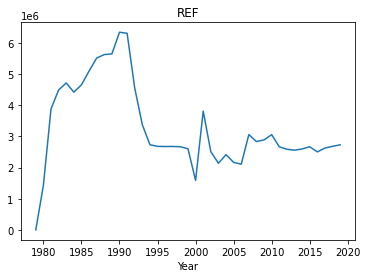

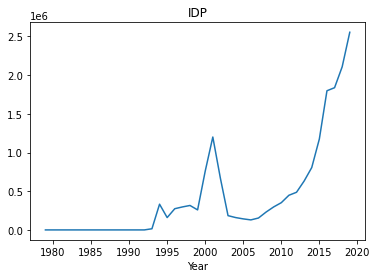

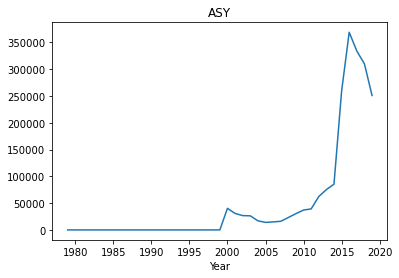

In [13]:
REF_IDP_ASY_Total.loc["AFG"].REF.plot()
plt.title("REF")
plt.show()
REF_IDP_ASY_Total.loc["AFG"].IDP.plot()
plt.title("IDP")
plt.show()
REF_IDP_ASY_Total.loc["AFG"].ASY.plot()
plt.title("ASY")
plt.show()

In [14]:
# country_codes = []
# for a, b in REF_IDP_ASY_Total.index:
#     country_codes.append(a)

In [15]:
REF_IDP_ASY_Total.loc["AFG"].values.shape

(41, 3)

In [16]:
# for country_code in country_codes:
#     # temp = REF_IDP_ASY_Total.loc[country_code].dropna()
#     # try:
#     REF_IDP_ASY_Total.loc[country_code].REF.plot()
#     plt.axvline(1990, c = "r")
#     plt.title(country_code)
    
#     plt.show()


In [17]:
cuac = []
for country_code in country_codes:
    cuac.append(REF_IDP_ASY_Total.loc[country_code].to_numpy())


In [18]:
cuac_2 = [a[-15:] for a in cuac if len(a[-15:])>=15]

In [19]:
cuac_npy = np.stack(cuac_2)
cuac_npy.shape

(184, 15, 3)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
X_train = cuac_npy[:,:-2]
Y_train = cuac_npy[:,-2]

X_test = cuac_npy[:,1:-1]
Y_test = cuac_npy[:,-1]

X_train_max = X_train.max(axis = 1) + 1e-10
X_train_min = X_train.min(axis = 1)

Y_train_max = Y_train.max() + 1e-10
Y_train_min = Y_train.min()

# X_train = (X_train - X_train_min[:,None]) / (X_train_max[:,None] - X_train_min[:,None])
# Y_train = (Y_train - X_train_min) / (X_train_max - X_train_min)

# X_test = (X_test - X_train_min[:,None]) / (X_train_max[:,None] - X_train_min[:,None])
# Y_test = (Y_test - X_train_min) / (X_train_max - X_train_min)

X_train = X_train / X_train_max[:,None, :] #Para que haga broadcasting
Y_train = Y_train / Y_train_max#[:,None]

X_test = X_test / X_train_max[:,None, :]
Y_test = Y_test / Y_train_max#[:,None]

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((184, 13, 3), (184, 3), (184, 13, 3), (184, 3))

In [27]:
terrain_info = pd.read_csv("Data/terrain_info.csv", encoding = "ISO-8859-1")
print("The dataset has {} rows and {} columns.".format(*terrain_info.shape))
terrain_info.head()

The dataset has 234 rows and 51 columns.


,isocode,isonum,country,rugged,rugged_popw,rugged_slope,rugged_lsd,rugged_pc,land_area,lat,...,africa_region_w,africa_region_e,africa_region_c,slave_exports,dist_slavemkt_atlantic,dist_slavemkt_indian,dist_slavemkt_saharan,dist_slavemkt_redsea,pop_1400,european_descent
0,ABW,533,Aruba,0.462,0.380,1.226,0.144,0.000,18.0,12.508,...,0,0,0,0.0,NaN,NaN,NaN,NaN,614.0,NaN
1,AFG,4,Afghanistan,2.518,1.469,7.414,0.720,39.004,65209.0,33.833,...,0,0,0,0.0,NaN,NaN,NaN,NaN,1870829.0,0.0
2,AGO,24,Angola,0.858,0.714,2.274,0.228,4.906,124670.0,-12.299,...,0,0,1,3610000.0,5.669,6.981,4.926,3.872,1223208.0,2.0
3,AIA,660,Anguilla,0.013,0.010,0.026,0.006,0.000,9.0,18.231,...,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,8,Albania,3.427,1.597,10.451,1.006,62.133,2740.0,41.143,...,0,0,0,0.0,NaN,NaN,NaN,NaN,200000.0,100.0


In [29]:
dist_cepii = pd.read_stata("Data/dist_cepii.dta")
print("The dataset has {} rows and {} columns.".format(*dist_cepii.shape))
dist_cepii.head()

The dataset has 50176 rows and 14 columns.


,iso_o,iso_d,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,dist,distcap,distw,distwces
0,ABW,ABW,0,0,0,0,0,0,0,0,5.225315,5.225315,25.093539,23.047228
1,ABW,AFG,0,0,0,0,0,0,0,0,13257.814453,13257.814453,13168.223762,13166.366934
2,ABW,AGO,0,0,0,0,0,0,0,0,9516.913086,9516.913086,9587.315563,9584.193415
3,ABW,AIA,0,0,1,0,0,0,0,0,983.268250,983.268250,976.897355,976.891580
4,ABW,ALB,0,0,0,0,0,0,0,0,9091.742188,9091.742188,9091.575727,9091.465815


In [31]:
geo_cepii = pd.read_stata("Data/geo_cepii.dta")
print("The dataset has {} rows and {} columns.".format(*geo_cepii.shape))
geo_cepii.head()

The dataset has 238 rows and 34 columns.


,iso2,iso3,cnum,country,pays,area,dis_int,landlocked,continent,city_en,...,lang9_2,lang9_3,lang9_4,colonizer1,colonizer2,colonizer3,colonizer4,short_colonizer1,short_colonizer2,short_colonizer3
0,AD,AND,20,Andorra,Andorre,453,8.005398,0.0,Europe,Andorra la Vella,...,,,,,,,,,,
1,AE,ARE,784,United Arab Emirates,Emirats arabes unis,83657,108.788994,0.0,Asia,Abu Dhabi,...,,,,GBR,,,,,,
2,AF,AFG,4,Afghanistan,Afghanistan,652225,303.761353,1.0,Asia,Kabul,...,Uzbek,,,,,,,GBR,,
3,AG,ATG,28,Antigua and Barbuda,Antigua-et-Barbuda,442,7.907605,0.0,America,Saint John's,...,,,,GBR,,,,,,
4,AI,AIA,660,Anguilla,Anguilla,102,3.798690,0.0,America,The Valley,...,,,,GBR,,,,,,


## Red Neuronal

In [24]:
import tensorflow as tf

In [25]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [136]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(18, return_sequences = False, input_shape=(13,3)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(3, activation = "relu")
])
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 18)                1584      
_________________________________________________________________
dropout_14 (Dropout)         (None, 18)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 57        
Total params: 1,641
Trainable params: 1,641
Non-trainable params: 0
_________________________________________________________________


In [137]:
model.compile(optimizer = tf.optimizers.Adam(lr=0.001), loss = "mse", metrics = ["mae"])

In [138]:
history = model.fit(X_train, Y_train, epochs=100, batch_size = 32, validation_data = (X_test, Y_test))

Epoch 1/100
6/6 [==============================] - 0s 82ms/step - loss: 0.0059 - mae: 0.0227 - val_loss: 0.0062 - val_mae: 0.0174
Epoch 2/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0053 - mae: 0.0199 - val_loss: 0.0059 - val_mae: 0.0164
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0057 - mae: 0.0189 - val_loss: 0.0057 - val_mae: 0.0159
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0062 - mae: 0.0192 - val_loss: 0.0054 - val_mae: 0.0155
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0049 - mae: 0.0163 - val_loss: 0.0050 - val_mae: 0.0156
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0048 - mae: 0.0176 - val_loss: 0.0047 - val_mae: 0.0157
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0056 - mae: 0.0194 - val_loss: 0.0047 - val_mae: 0.0156
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0051 - mae: 0.0183 - 

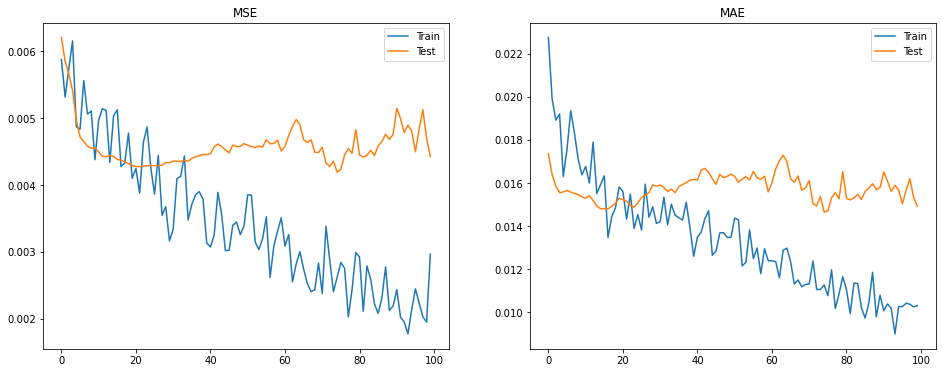

In [139]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
plt.title("MSE")
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.legend()
plt.subplot(1,2,2)
plt.title("MAE")
plt.plot(history.history["mae"], label = "Train")
plt.plot(history.history["val_mae"], label = "Test")
plt.legend()
plt.show()

In [159]:
pred_test = model.predict(X_test)

In [165]:
X_test.shape, pred_test.shape

((184, 13, 3), (184, 3))

In [172]:
X_test_2 = np.concatenate((X_test, pred_test[:,None,:]), axis = 1)
X_test_2 = X_test_2[:,1:,:]
X_test_2.shape

(184, 13, 3)

In [173]:
pred_test_2 = model.predict(X_test_2)

In [175]:
def predict_future(data, steps_in_future=1):
    for i in range(steps_in_future):
        pred = model.predict(data)
        data = np.concatenate((data,pred[:,None,:]), axis = 1)
        data = data[:,1:,:]

    return data[:,-steps_in_future:,:]

In [177]:
patata = predict_future(X_test, 5)

# Dos entradas

In [184]:
class LSTM_Extra(tf.keras.Model):
    def __init__(self, lstm_cells = 18, dense_inputs = 1, outputs = 3):
        super(LSTM_Extra, self).__init__()
        self.lstm = tf.keras.layers.LSTM(lstm_cells, return_sequences = False)
        self.dense_input = tf.keras.layers.Dense(dense_inputs, activation = "relu")
        self.dense_final = tf.keras.layers.Dense(outputs, activation = "linear")

    def call(self, x):
        time_series, static_features = x
        lstm_output = self.lstm(time_series)
        dense_output = self.dense_input(static_features)
        return dense_final((lstm_output, dense_output))

In [187]:
test_model = LSTM_Extra()